In [1]:
#questions 
#Which character appears the most?
#Which character talks the most in all the movies (1st -5th)


#imports
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


#read files
chars_df = pd.read_csv('./resources/characters.csv')

In [2]:
chars_df.head()

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
0,TONY STARK,0,173,137,119,0,165,0,0,0,...,74,152,0,0,0,1788,22590,9,12,198
1,STEVE ROGERS,3,133,119,25,0,154,186,218,3,...,7,121,0,0,0,977,8653,10,8,97
2,THOR,0,55,70,74,0,0,0,0,0,...,0,47,166,289,133,863,9487,7,10,123
3,PETER PARKER,0,0,7,39,0,73,0,0,0,...,402,0,0,0,0,551,5517,4,10,137
4,NATASHA ROMANOFF,1,79,69,15,0,64,0,112,3,...,0,97,0,1,0,498,4689,10,9,49


In [3]:
#appears the most in the movies 
sorted_char = chars_df.sort_values(by = ["movie appearances"], ascending=False)
clean_df = sorted_char[["character", "movie appearances"]]
extra_clean_df = clean_df[:10]
extra_clean_df

,character,movie appearances
136,STAN LEE,11
1,STEVE ROGERS,10
4,NATASHA ROMANOFF,10
0,TONY STARK,9
10,JAMES RHODES,8
2,THOR,7
5,PEPPER POTTS,7
6,BRUCE BANNER,7
7,NICK FURY,7
8,LOKI,6


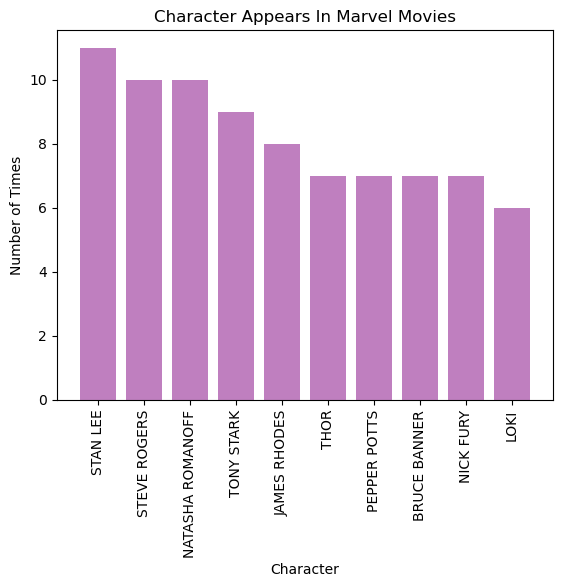

In [4]:
#bar chart for table extra_clean_df
x_axis = np.arange(len(extra_clean_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, extra_clean_df["movie appearances"], color="purple", alpha=0.5, align ="center")
plt.xticks(tick_locations, extra_clean_df["character"], rotation="vertical")
plt.title("Character Appears In Marvel Movies")
plt.xlabel("Character")
plt.ylabel("Number of Times")
plt.savefig("./CharAppears.png")

In [5]:
#talks the most in the movies
talks_char = chars_df.sort_values(by = ["total words"], ascending=False)
clean_talks_char = talks_char[["character", "total words"]]
eclean_talks_char = clean_talks_char[:10]
eclean_talks_char

,character,total words
0,TONY STARK,22590
2,THOR,9487
1,STEVE ROGERS,8653
3,PETER PARKER,5517
4,NATASHA ROMANOFF,4689
7,NICK FURY,4524
8,LOKI,4097
6,BRUCE BANNER,3840
5,PEPPER POTTS,3492
10,JAMES RHODES,3486


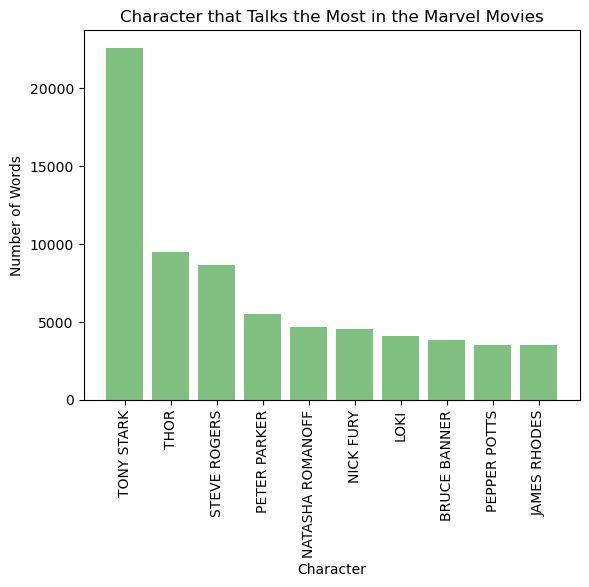

In [6]:
#bar chart for data above
x_axis = np.arange(len(eclean_talks_char))
tick_locations = [value for value in x_axis]


plt.bar(x_axis, eclean_talks_char["total words"], color="green", alpha=0.5, align ="center")
plt.xticks(tick_locations, eclean_talks_char["character"], rotation="vertical")
plt.title("Character that Talks the Most in the Marvel Movies")
plt.xlabel("Character")
plt.ylabel("Number of Words")
plt.savefig("./CharTalks.png")